In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-14 01:59:19--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-14 01:59:19--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5e76600869d375a8663112608.dl.dropboxusercontent.com/cd/0/get/BwulGEkz-tJwCxpF6RUzzkx9TnAe3T-YXVCrIo15WQoGvHh6D-_UYDtkVQtJeFqQ3x9dml-aB-goKUvgcnYiUAlo959VGrqCpiutDJCD0WYKxouZyk7mqBiLjxCqxd6DX8Ajibk6cix5h7HVSFlBbIwr7xGuxZr5vF4Pz_Ekn7NdwYpQpA4ZdGLBiYWeAefOly8/file?dl=1# [following]
--2022-11-14 01:59:20--  https://ucf5e76600869d375a8663112608.dl.dropboxusercontent.com/cd/0/get/BwulGEkz-tJw

In [3]:
from konlpy.tag import Kkma, Hannanum, Komoran, Twitter, Okt, Mecab

In [4]:
kkma = Kkma()
okt = Okt()
komoran = Komoran()
hannanum = Hannanum()
twitter = Twitter()
mecab = Mecab()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [58]:
import os 
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'swMRG8plbs7LYwkTMHoz'
client_secret = 'jV02Ini3sh'

query = urllib.parse.quote(input("검색 질의: ")) #parse 해주는 이유 사용자 입력값 url로 넣을 수 있는 형태로 변환
idx = 0 
display = 100
start = 1 
end =1000    #네이버 최대 보여줄 수 있는 건 수 1000개

web_df = pd.DataFrame(columns=('Title','Link','Description'))

for start_index in range(start, end, display):


  url = 'https://openapi.naver.com/v1/search/webkr?query=' + query \
    + '&display=' + str(display) + '&start=' + str(start_index)

  request = urllib.request.Request(url)    #요청
  request.add_header('X-Naver-Client-Id', client_id)
  request.add_header('X-Naver-Client-Secret',client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')              # html 태그 특수기호 제거
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      web_df.loc[idx] = [title, link, description]
      idx += 1
  else :
    print("Error Code: " + rescode)

                                                      

   
web_df

검색 질의: 인천여행


,Title,Link,Description
0,2022년 대한민국 인천 여행정보 - Tripadvisor - 인천 여행,https://www.tripadvisor.co.kr/Tourism-g297889-...,"인천 휴가: 인천, 대한민국 여행에 대한 29,083 건의 리뷰를 보유하고있는 트립..."
1,[인천 여행 꿀정보] 인천 토박이의 인천 볼거리&amp;맛집 총정리 : 인터파크투어...,http://tour.interpark.com/freeya/Discovery/Vie...,[인천 여행 꿀정보] 인천 토박이의 인천 볼거리&amp;맛집 총정리 퍼가기
2,"인천 가볼만한 곳 베스트 10, 당일치기 뚜벅이 여행!",https://brunch.co.kr/@hotelscomkr/924,"인천 여행, 인천 가볼만한 곳, 인천 당일치기 여행, 인천 여행지 | 가까운 곳으로..."
3,인천투어,https://itour.incheon.go.kr/,"인천광역시 소개, 주요행사, 이벤트, 백령도, 팔미도, 마니산 등 관광명소, 숙박시..."
4,인천의 가볼 만한 곳 베스트 10 - Go Guides - 호텔스닷컴,https://kr.hotels.com/go/south-korea/kr-best-i...,옛 한양의 바다 관문인 제물포가 커지며 형성된 도시 인천은 우리나라 근현대사의 역사...
...,...,...,...
195,인천여행 - 홈 | Facebook,https://www.facebook.com/SEOULMUCKBANG,인천여행. 좋아하는 사람 163명. 도서관
196,개항장 레트로 감성의 인천둘레길(상세)&lt;테마별 여행&lt;테마여행&lt;인천투어 홈,https://itour.incheon.go.kr/thmtour/thmtour/de...,불러일으키는 여행지가 주를 이룬다. ◎ 코스 경로 : 도원역 - 우각로문화마을(구 ...
197,인천투어패스,http://ictourpass.co.kr/,인천 주요 관광지를 모바일 하나로 자유롭게!
198,인천대공원(상세)&lt;자연&lt;여행지&lt;인천투어 홈,https://itour.incheon.go.kr/ssst/ssst/detail.d...,"봄에는 벚꽃이 흩날리고 여름에는 초록빛 향기가 흐르며, 가을에는 단풍과 낙엽이 서정..."


In [91]:
web = []
for d in web_df.Description :
  web.append(d)

print(web[:5])

['인천 휴가: 인천, 대한민국 여행에 대한 29,083 건의 리뷰를 보유하고있는 트립어드바이저는 인천의 정보원입니다.', '[인천 여행 꿀정보] 인천 토박이의 인천 볼거리&amp;맛집 총정리 퍼가기', '인천 여행, 인천 가볼만한 곳, 인천 당일치기 여행, 인천 여행지 | 가까운 곳으로 바람 쐬러 떠나고 싶을 때 훌쩍 떠나기 좋은 인천. 서해안을 따라 드라이브하기에도 좋고 대중교통도 잘 갖춰져 있어 뚜벅이 여행도 문제없는 곳입니다. 인천 가볼 만한 곳을 찾으신다면 아래를 주목해주세요. 빼놓을 수 없는 필수 스팟들로만 정리해놓았으니, 자동차나 지하철,...', '인천광역시 소개, 주요행사, 이벤트, 백령도, 팔미도, 마니산 등 관광명소, 숙박시설, 교통정보 등 안내.', '옛 한양의 바다 관문인 제물포가 커지며 형성된 도시 인천은 우리나라 근현대사의 역사적 사건이 자주... 서해와 수많은 섬이 만들어 내는 아름다운 풍경은 인천이 사랑받는 또 하나의 이유지요.']


In [64]:
stop_words = ''
stop_words = stop_words.split(' ')
print(stop_words)

['']


In [ ]:
tagger = Mecab()
web_nouns =[]
for w in web:
  for noun in tagger.nouns(w):
    if noun not in stop_words:
      web_nouns.append(noun)

web_nouns[:10]

In [110]:
# 네이버 블로그 키워드 분석
from pyparsing.helpers import original_text_for
import os 
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'swMRG8plbs7LYwkTMHoz'
client_secret = 'jV02Ini3sh'

query = urllib.parse.quote(input("검색 질의: ")) #parse 해주는 이유 사용자 입력값 url로 넣을 수 있는 형태로 변환
idx = 0 
display = 100
start = 1 
end =1000    #네이버 최대 보여줄 수 있는 건 수 1000개
sort = 'sim'  #유사도순으로 정렬

blog_df = pd.DataFrame(columns=('Title','Link','Description','Blogger Name', 'Blogger Link'))

for start_index in range(start, end, display):


  url = 'https://openapi.naver.com/v1/search/blog?query=' + query \
    + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort

  request = urllib.request.Request(url)    #요청
  request.add_header('X-Naver-Client-Id', client_id)
  request.add_header('X-Naver-Client-Secret',client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')              # html 태그 특수기호 제거
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      blogger_name = items[item_index]['bloggername']
      blogger_link = items[item_index]['bloggerlink']
      blog_df.loc[idx] = [title, link, description , blogger_name,blogger_link]
      idx += 1
  else :
    print("Error Code: " + rescode)

                                                      

   
blog_df

검색 질의: 인천여행|청소년|방학


,Title,Link,Description,Blogger Name,Blogger Link
0,"인천문화예술회관, 여름 방학 시즌 청소년 음악회",https://blog.naver.com/artspr/222441137886,여름방학을 맞이해 인천문화예술회관에서 엄선한 6개의 청소년 음악회 즐거워야 할 여름...,인천문화예술회관,blog.naver.com/artspr
1,[청소년인문학여행26]24일차 파리-인천,https://blog.naver.com/sunmiroh/222848227662,2022.8.12(금) 파리--&gt; 인천 여름방학 스페이스꿈틀 청소년유럽인문학여...,건강이 최고의 투자!,blog.naver.com/sunmiroh
2,여름방학 체험기회/근현대사 역사교육/인천 서구청소년센터...,https://blog.naver.com/godqhrgkwk38/222848446553,답사여행을 바로 가는 게 아니라 가기 전에 오리엔테이션과 안전교육을 비롯하여 이론수...,인생초보김선생의 인생터널탈출기,blog.naver.com/godqhrgkwk38
3,여름방학맞이 인천하늘수 역사여행 -송현배수지 제수변실,https://blog.naver.com/incheonsudoin/222846576468,"과거 인천의 모습을 직접 보고 체험할 수 있습니다. 입장료는 성인 1,000원, 청...",인천광역시상수도사업본부,blog.naver.com/incheonsudoin
4,"동부 명문대학 투어 2022년 여름방학, 청소년 &amp; 학부모 동행 여행",https://blog.naver.com/dasundoye/222735873325,2022년 여름방학을 맞아 청소년과 학부모가 함께 미국 명문 아이비리그 대학교와 동...,e교육정보채널,blog.naver.com/dasundoye
...,...,...,...,...,...
995,[공모전] 6월 3주 공모전&amp;대외활동 소식,https://blog.naver.com/mksbucs/222775107781,"인천녹색연합, 인천일보 22.06.15~22.07.20 접수중 D-34 120 여름...",bostory,blog.naver.com/mksbucs
996,2022년 07월 4주차 전국광역시 축제 정보와 공연 및 행사 일정,https://blog.naver.com/myfriendcjg/222822468511,2022년08월07일 인천광역시 옹진군 제6회 주섬주섬 음악회 2022년07월23일...,워니파파 블로그,blog.naver.com/myfriendcjg
997,지역전략 올라타기 : 스마트 항만으로 변신하는 인천항 (220630),https://blog.naver.com/newhopeman/222794440419,80년만에 인천 시민의 품으로 돌아온 부평 캠프마켓 : 11월까지 시민 참여 프로그...,바로바로 올라타기,blog.naver.com/newhopeman
998,"정남진 장흥 물축제, 여름축제로 최고!!!",https://blog.naver.com/tcacyc/221597989061,그래서 올해는 산이나 정적인 느낌이 있는 여행지 말고 시원하고 신나는 여름축제나 그...,일상탈출,blog.naver.com/tcacyc


In [111]:
blog = []
for b in blog_df.Description:
  blog.append(b)


print(blog[:5])

['여름방학을 맞이해 인천문화예술회관에서 엄선한 6개의 청소년 음악회 즐거워야 할 여름방학이지만, 코로나19로 인해 여행도 체험도 쉽지 않은 청소년과 가족들을 위해 인천문화예술회관에서 엄선한 6개의... ', '2022.8.12(금) 파리--&gt; 인천 여름방학 스페이스꿈틀 청소년유럽인문학여행 서유럽남유럽코스에 함께 해주신 모든 청소년 참가자들과 보호자분들에게 진심으로 감사인사를 드립니다. 년간의 코로나 상황의 공백을... ', '답사여행을 바로 가는 게 아니라 가기 전에 오리엔테이션과 안전교육을 비롯하여 이론수업을 받고... @인생초보김선생 #초등생의여름방학체험기회_근현대사역사교육_인천서구청소년센터그날의기억... ', '과거 인천의 모습을 직접 보고 체험할 수 있습니다. 입장료는 성인 1,000원, 청소년(13세~18세) 700원... 이 모두가 수도국산 안에 있으니 이번 여름 방학에 수도국산을 찾아 인천 수돗물의 역사를 들여다보는 것은... ', '2022년 여름방학을 맞아 청소년과 학부모가 함께 미국 명문 아이비리그 대학교와 동부 명문... 약1$, 여행자보험(1-2만원) 현지 입국 전 신속 항원검사 영문 음성 결과서 혹은 PCR검사비, 현지 개인 사용... ']


In [128]:
stop_words = '학교 기간 출발 이용 한국 해외 도서관 진행 대상 무료 중학생 운영 준비 대학생 기획 전국 특별 인천광역시 미국 서울 해외여행 겨울 유럽 세 성인 싱 금 파리 프로 듀 한국인 최초 항해사 환경 지구 랩 프로 듀 그린피스 인천 이곳 청소년 공간 다누 이달 휴먼 여름 방학 회관 엄선 개 코로나 북 길 호 티 웨이 후 운항 말씀 스케줄 후 여행 일 월 시간 공항 도착 나 년 때 수 시 날 만 분 비행기 것 정 거 전 번 이번 우리 박 곳 내 중 정도 리 이상 자리 거리 위치 유명 서쪽 소개 주 원 층 등 끝 게 명 저'
stop_words = stop_words.split(' ')
print(stop_words)

['인천광역시', '미국', '서울', '해외여행', '겨울', '유럽', '세', '성인', '싱', '금', '파리', '프로', '듀', '한국인', '최초', '항해사', '환경', '지구', '랩', '프로', '듀', '그린피스', '인천', '이곳', '청소년', '공간', '다누', '이달', '휴먼', '여름', '방학', '회관', '엄선', '개', '코로나', '북', '길', '호', '티', '웨이', '후', '운항', '말씀', '스케줄', '후', '여행', '일', '월', '시간', '공항', '도착', '나', '년', '때', '수', '시', '날', '만', '분', '비행기', '것', '정', '거', '전', '번', '이번', '우리', '박', '곳', '내', '중', '정도', '리', '이상', '자리', '거리', '위치', '유명', '서쪽', '소개', '주', '원', '층', '등', '끝', '게', '명', '저']


In [129]:
tagger = Mecab()
blog_nouns = []
for b in blog:
  for noun in tagger.nouns(b):
    if noun not in stop_words:
      blog_nouns.append(noun)

blog_nouns[:10]

['문화예술', '음악회', '체험', '가족', '문화예술', '스페이스', '인문학', '서유럽', '남유럽', '코스']

In [130]:
from collections import Counter
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

{'캠프': 232,
 '어린이': 168,
 '체험': 167,
 '아이': 166,
 '문화': 109,
 '프로그램': 98,
 '학교': 78,
 '교육': 75,
 '가족': 69,
 '활동': 69,
 '박물관': 67,
 '학생': 67,
 '기간': 67,
 '출발': 63,
 '이용': 60,
 '음악회': 59,
 '한국': 58,
 '해외': 56,
 '도서관': 56,
 '진행': 54,
 '센터': 53,
 '대상': 52,
 '무료': 52,
 '중학생': 50,
 '운영': 49,
 '음악': 49,
 '차': 49,
 '중국': 48,
 '지역': 48,
 '회': 48,
 '영어': 47,
 '동안': 46,
 '천': 46,
 '모집': 45,
 '시작': 45,
 '친구': 44,
 '계획': 43,
 '어른': 43,
 '국제': 42,
 '할인': 42,
 '배낭': 41,
 '예술': 41,
 '오후': 40,
 '집': 40,
 '세계': 39,
 '초등': 38,
 '일본': 38,
 '공연': 38,
 '클래식': 36,
 '추천': 36,
 '일정': 35,
 '학습': 34,
 '아동': 33,
 '국내': 33,
 '사진': 33,
 '생각': 32,
 '요금': 32,
 '관': 31,
 '학년': 31,
 '간': 30,
 '입장료': 30,
 '연수': 30,
 '단체': 30,
 '부모': 30,
 '참가': 29,
 '안내': 29,
 '가능': 29,
 '토': 29,
 '관람': 29,
 '코스': 28,
 '역사': 28,
 '주말': 28,
 '독서': 28,
 '뎀': 27,
 '꿈': 27,
 '과학관': 27,
 '해설': 27,
 '나라': 26,
 '이하': 26,
 '과학': 26,
 '교실': 26,
 '축제': 26,
 '경기': 26,
 '장': 25,
 '봉사': 25,
 '탐방': 25,
 '책': 25,
 '고등학생': 25,
 '장소': 25,
 '시즌': 25,
 '체험

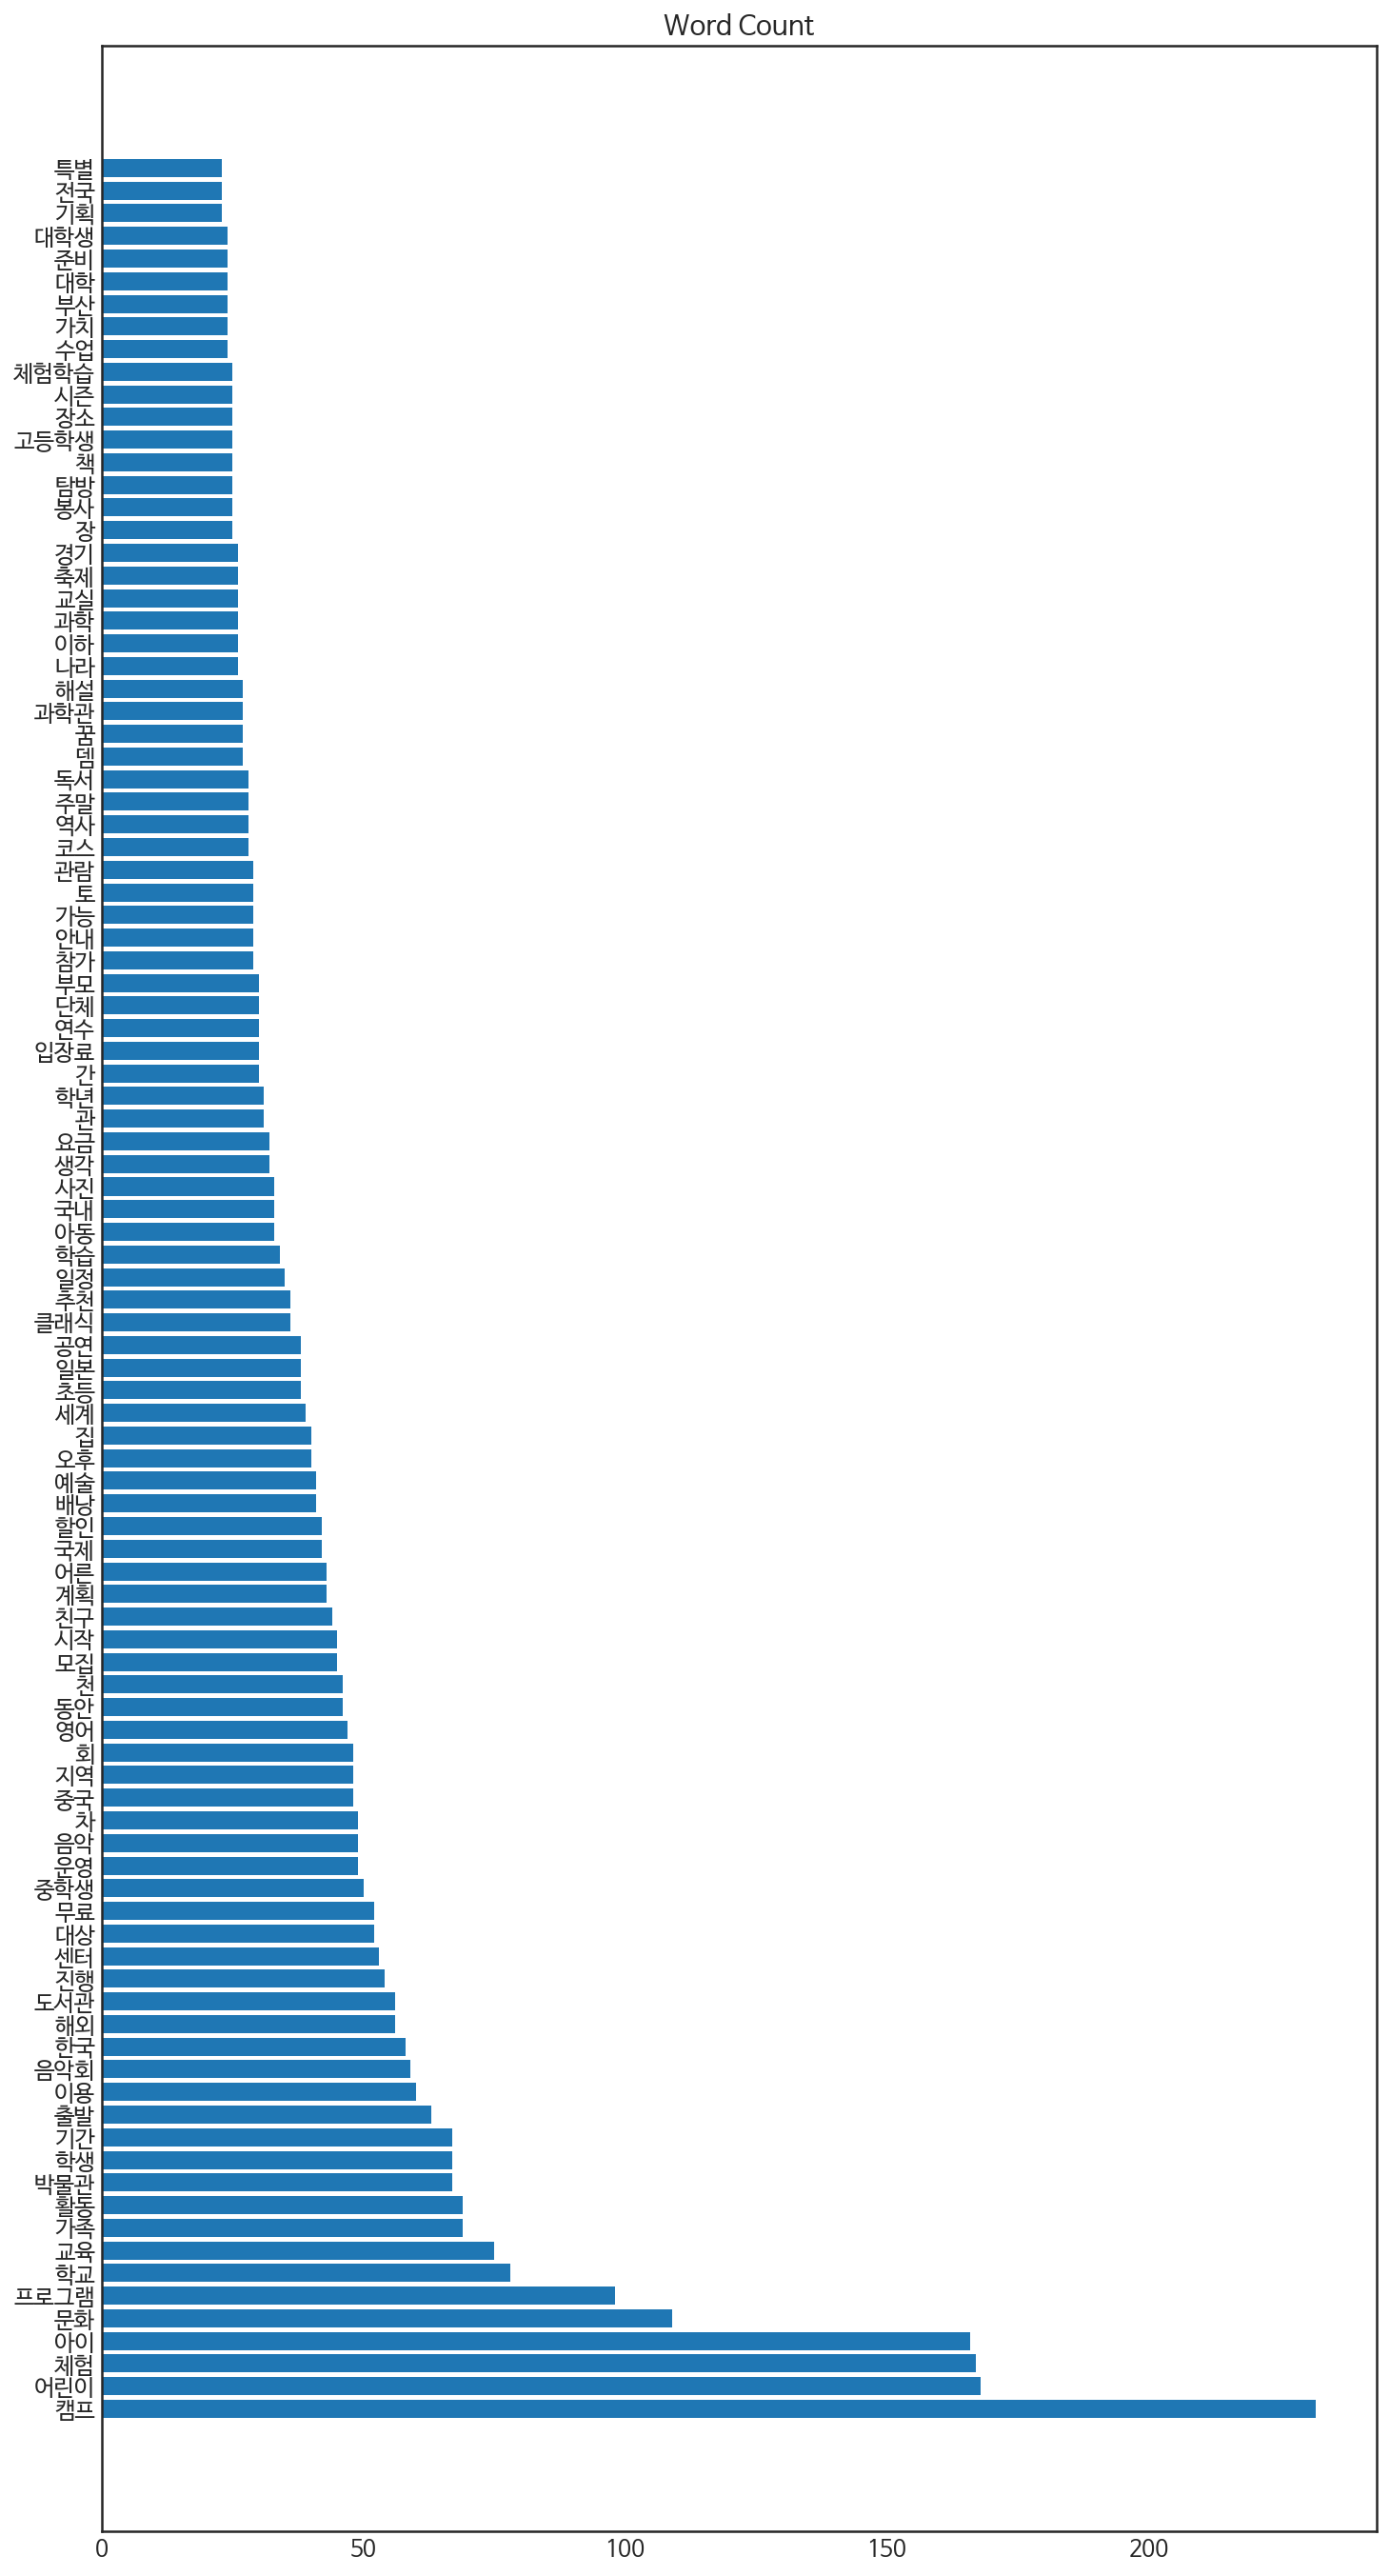

In [131]:
#단어 빈도 시각화
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos,top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos,top_blog_nouns.keys())
plt.show()

In [48]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


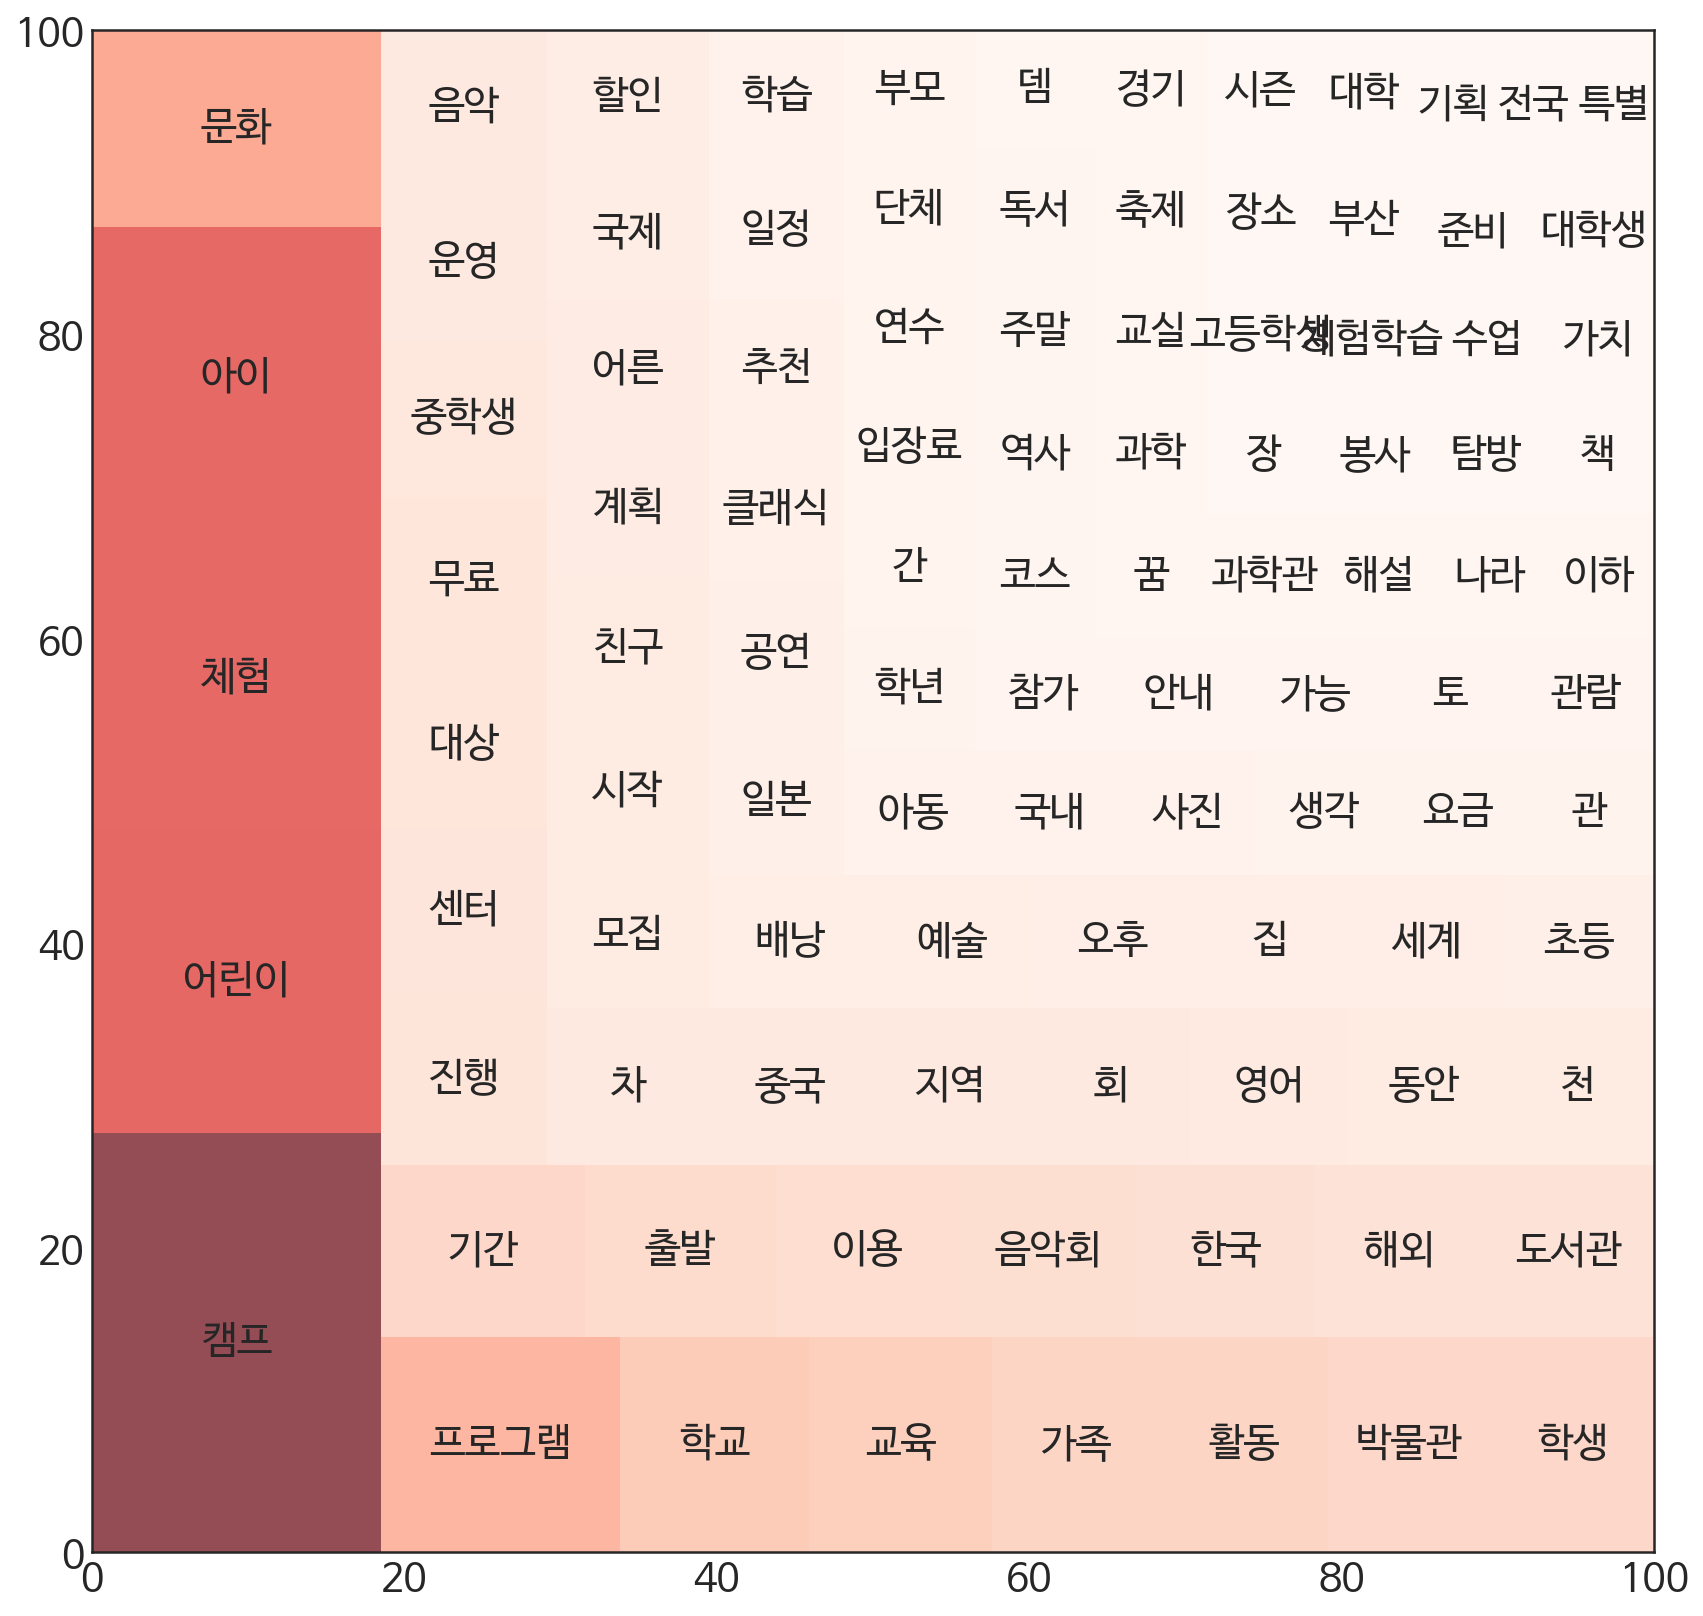

In [132]:

import squarify
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_blog_nouns.values()), 
                            vmax = max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label = top_blog_nouns.keys(),
              sizes= top_blog_nouns.values(),
              color = colors,
              alpha =.7);


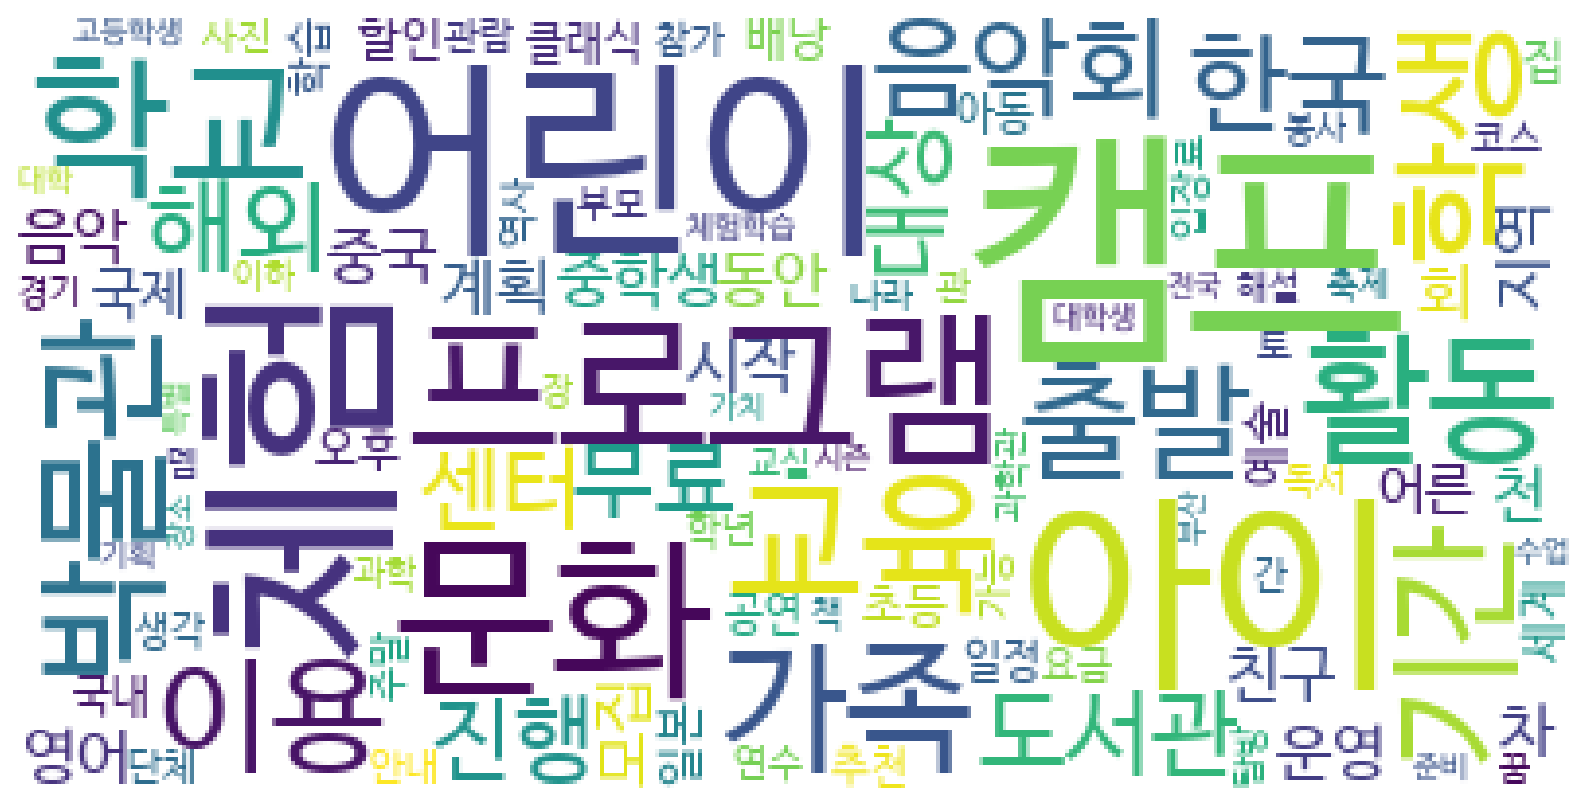

In [133]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', font_path = './font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()


In [90]:
blog_df.to_csv("blog_dataframe.csv",encoding='utf-8-sig',index = False)